In [9]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Matplotlib is building the font cache; this may take a moment.


In [45]:
def kmeans_numpy(X, n_clusters, max_iters=100):

    """
    Hint:
    if implementing using numpy array:
    the shape of centroids is (n_clusters x 3), a 2D array
    The shape of labels is (for the given sample image) 512 x 512 = 262144 --> a 1D array
    """
    # Initialize cluster centroids randomly
    centroids = X[np.random.choice(len(X), n_clusters, replace=False)]

    for _ in range(max_iters):
        # Calculate the distance from each point to each centroid
          ###########
          # Fill here
        distances = np.linalg.norm(X[:,np.newaxis,:] - centroids, axis=2)
          ###########
        # Assign each point to the nearest cluster
          ###########
          # Fill here
        labels = np.argmin(distances,axis = 1)
          ###########
        # Create an empty array to store the new centroids
        new_centroids = np.zeros((n_clusters, X.shape[1]))

        # Loop through each cluster
        for i in range(n_clusters):
            # Find all data points that belong to the current cluster
            cluster_points = X[labels == i] # fill here
        
            # Calculate the mean (average) of all data points in the cluster
            cluster_mean = np.mean(cluster_points,axis = 0)

            # Assign the cluster mean as the new centroid
            new_centroids[i] = cluster_mean

        # Check for convergence
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return centroids, labels



In [46]:
def create_compressed_image(labels, centroids, height, width, channels):
    """
    Hint:
    Assign the cluster value to the pixel of that cluster
    """
    # Step 3: Create a compressed image based on cluster centroids
    compressed_image = np.zeros((height, width, channels), dtype=np.uint8)
    for i in range(height):
        for j in range(width):
          ###########
          # Fill here
          ###########
          compressed_image[i][j] = centroids[labels[width* i + j]]
    print(compressed_image)
    return compressed_image

[[224.79198767 125.48613251 105.03576932]
 [200.64354889 154.13089659 156.90378007]
 [232.45561753 141.50565737 111.20318725]
 [150.15279823  71.25883652  92.49521355]
 [191.32371678 120.771751   120.67710229]
 [221.65715957 152.06918239 140.01301741]
 [198.36365516  97.95627455 102.00392805]
 [235.30502831 205.74841825 190.49417249]
 [ 97.87694172  32.94502589  78.04748265]
 [215.87218136 113.60291812 112.95622814]
 [243.27404281 204.56406391 159.53693096]
 [145.66289517  98.47420965 147.5733777 ]
 [ 82.55714393  15.84741554  60.85727184]
 [224.12346437 131.03624079 123.16554054]
 [194.60629545  81.37810945  84.80118638]
 [208.68022623  92.91233413  90.85534044]
 [236.01526489 155.71789883 122.36351392]
 [116.3676246   33.60335971  65.56101624]
 [224.59400959 189.1960922  177.1047151 ]
 [115.13274843  50.11977875  96.44993324]
 [177.94545455  79.15861601  90.78724559]
 [219.58396817 106.58422211  98.55595057]
 [158.81444126  56.15266476  73.9774212 ]
 [239.50177515 186.06242604 133.67

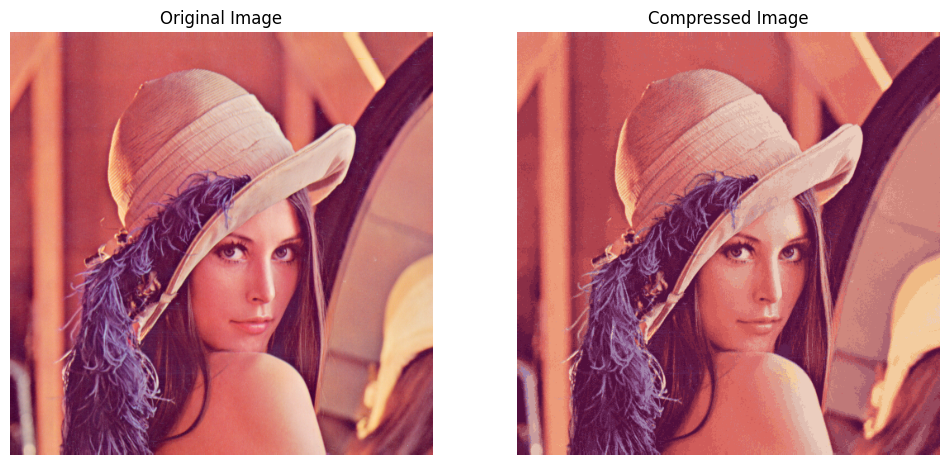

In [47]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def kmeans_image_compression(image_path, num_clusters):
    # Step 1: Load the image
    original_image = cv2.imread(image_path)

    # Convert the image to RGB color space (if it's not already)
    original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

    # Get the dimensions of the image
    height, width, channels = original_image.shape

    # Step 2: Apply K-means clustering using numpy
    pixel_values = original_image.reshape(-1, 3)
    centroids, labels = kmeans_numpy(pixel_values, num_clusters)
    print(centroids)

    # Step 3: Create a compressed image based on cluster centroids
    compressed_image = create_compressed_image(labels, centroids, height, width, channels)

    # Step 4: Save the compressed image
    compressed_image_path = "compressed_image.png"
    cv2.imwrite(compressed_image_path, cv2.cvtColor(compressed_image, cv2.COLOR_RGB2BGR))

    # Save the original image in the same format as the compressed one
    original_image_path = "original_image.png"
    cv2.imwrite(original_image_path, cv2.cvtColor(original_image, cv2.COLOR_RGB2BGR))

    # Calculate and print the compression ratio
    original_size = os.path.getsize(original_image_path)
    compressed_size = os.path.getsize(compressed_image_path)
    compression_ratio = original_size / compressed_size

    print(f"Original image size: {original_size} bytes")
    print(f"Compressed image size: {compressed_size} bytes")
    print(f"Compression ratio: {compression_ratio:.2f}")

    # Show the original and compressed images using matplotlib
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(original_image)
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(compressed_image)
    plt.title("Compressed Image")
    plt.axis("off")

    plt.show()

if __name__ == "__main__":
    image_path = "test_image.png"

    num_clusters = 32 # Adjust the number of clusters as needed
    kmeans_image_compression(image_path, num_clusters)


a written answer: 
The impact of increasing the number of clusters is that there are more colors on the final compressed image. There is a trade off. If you increase the number of clusters, the image is more detailed and better accurately represents the colors on the original image but the image compression is larger. 

b: Say that the image you are compressing is nxn. And the number of gaussians would be a hyperparameter k just like in K means. Then you would have to pick an appropriate mean , convariance, and weight for each gaussian. These woudl also be hyperparameters. then Yij = (mj*G(xi,mean of j,convariance of j))/(the sum over all js in range(K): mj*G(xi,mean of j,covariance of j). You would use all these values to create the Y matrix, then for each row of the matrix, you look at which element ahs the greatest probability. If that element in in column j, then gaussian j is mostly likely to have Xi in it. Then for each gaussian j, the new weight becomes the average of the jth column in teh Y matrix, and for the new mean of gaussian j you basically calculate the (sum of Yi,j * Xi for all points i in gaussian j)/ (sum of Yi,j) (weighted average of the points that belong to gaussian j). Then for the covariance of gaussian j it is (sum Yi,j for all points Xi in cluster j multiplied by (Xi - mean of j) multiplied by (Xi - mean of j)^T)/(sum of Yi,j for all points Xi in gaussian j). Then you would keep doing this expectation-maximizaion step until you meet your requirements, such as small difference between interations or reaching a certain number of iterations. Then you for pixels (i,j) in range(N,N), you could assign them a color which is the mean of the gaussian they belong to. 